In [43]:
import numpy as np
from hypo_gym.base import ChestSearchEnv
import matplotlib.pyplot as plt
from nav_sim_modules import MAP_OBS_VAL, MAP_PASS_VAL, MAP_UNK_VAL

In [44]:
env = ChestSearchEnv(path_turnable=np.pi/8, avoidance_size=3, move_limit=-1, path_planning_count=10, path_exploration_count=4000)

In [45]:
obs = env.reset(is_generate_pose=True)

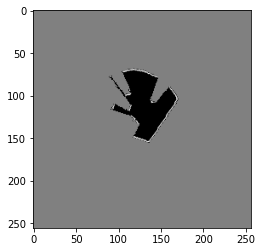

In [46]:
obs[obs==-1] = 50
plt.imshow(obs, cmap='gray')

In [47]:
env.step(env.action_space.sample())

(array([[-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        ...,
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1],
        [-1, -1, -1, ..., -1, -1, -1]]),
 0,
 False,
 [])

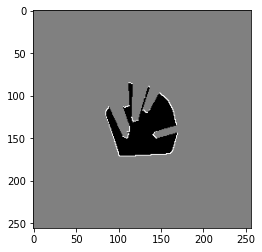

In [48]:
trueth = np.copy(env.actioner.navs.mapper.occupancy_map)
trueth[trueth==-1] = 50
plt.imshow(trueth, cmap='gray')

In [49]:
N = 100

In [50]:
heat = np.zeros_like(env.observation_space.sample())
for i in range(N):
    obs = env.reset(is_generate_room=False)
    # heat += (env.scener.env_pixel == MAP_PASS_VAL) / N
    heat += (env.actioner.occupancy_map == MAP_PASS_VAL) / N
    # heat += (obs == MAP_OBS_VAL) / N

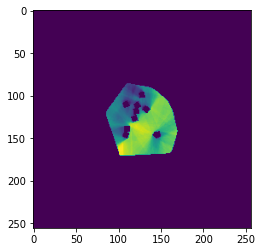

In [51]:
plt.imshow(heat)